In [1]:
import scanpy as sc
import pandas as pd
import anndata
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

font_size = 7
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size, 'legend.fontsize':font_size, 
    'legend.markerscale': 0.8, 
    'legend.markerscale': 0.8, 
    'legend.loc': 'center right',
    'legend.borderpad':0,
    'legend.columnspacing': 0.5,
    'legend.labelspacing': 0.2,
    'legend.handletextpad': 0,
    'legend.borderaxespad': 0,
    'legend.handleheight': 0.5,
    'legend.handlelength': 1.0,
    'figure.constrained_layout.h_pad': 0.00001,
    'figure.constrained_layout.w_pad': 0.00001
   }
sns.set(style='ticks',rc=rc) #talk, ticks, paper
sns.set_context("paper", rc=rc)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

centimeter = 1/2.54  # centimeter in inches

In [1]:
import sys
sys.path.append('../../')

In [2]:
adata_seqFISH = sc.read_h5ad(
    './result/multiplatform/seqFISH/SpaSEG_seqFISH.h5ad')
adata_seqFISH

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined', 'array_row', 'array_col', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters', 'ground_truth_code'
    var: 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'celltype_mapped_refined_colors', 'metrics', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'

In [3]:
clist=['#D3D3D3',
'#CABFD9',
'#BDA7E0',
'#B295E5',
'#A07AEC',
'#9870ED',
'#8157F3',
'#7045F7',
'#653AF8',
'#4E32FB',
'#2732FD',
'#002EFF',]   #蓝紫灰

In [4]:
import matplotlib.transforms as mtransforms

In [5]:
newcmp = LinearSegmentedColormap.from_list('new',clist)

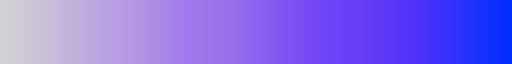

In [6]:
newcmp

In [13]:
gene_view = ['Ttn', 'Popdc2', 'Hand1', 'Gata5',
             'Six3', 'Lhx2', 'Otx2', 'Pou3f1', 
             'Sox2', 'Foxf1', 'Foxa1', 'Cldn4']

In [30]:
gene_view = ['Six3', 'Lhx2', 'Otx2', 'Sox2', ]

In [33]:
structure = ['brain', 'brain', 'brain', 'spinal cord and brain']

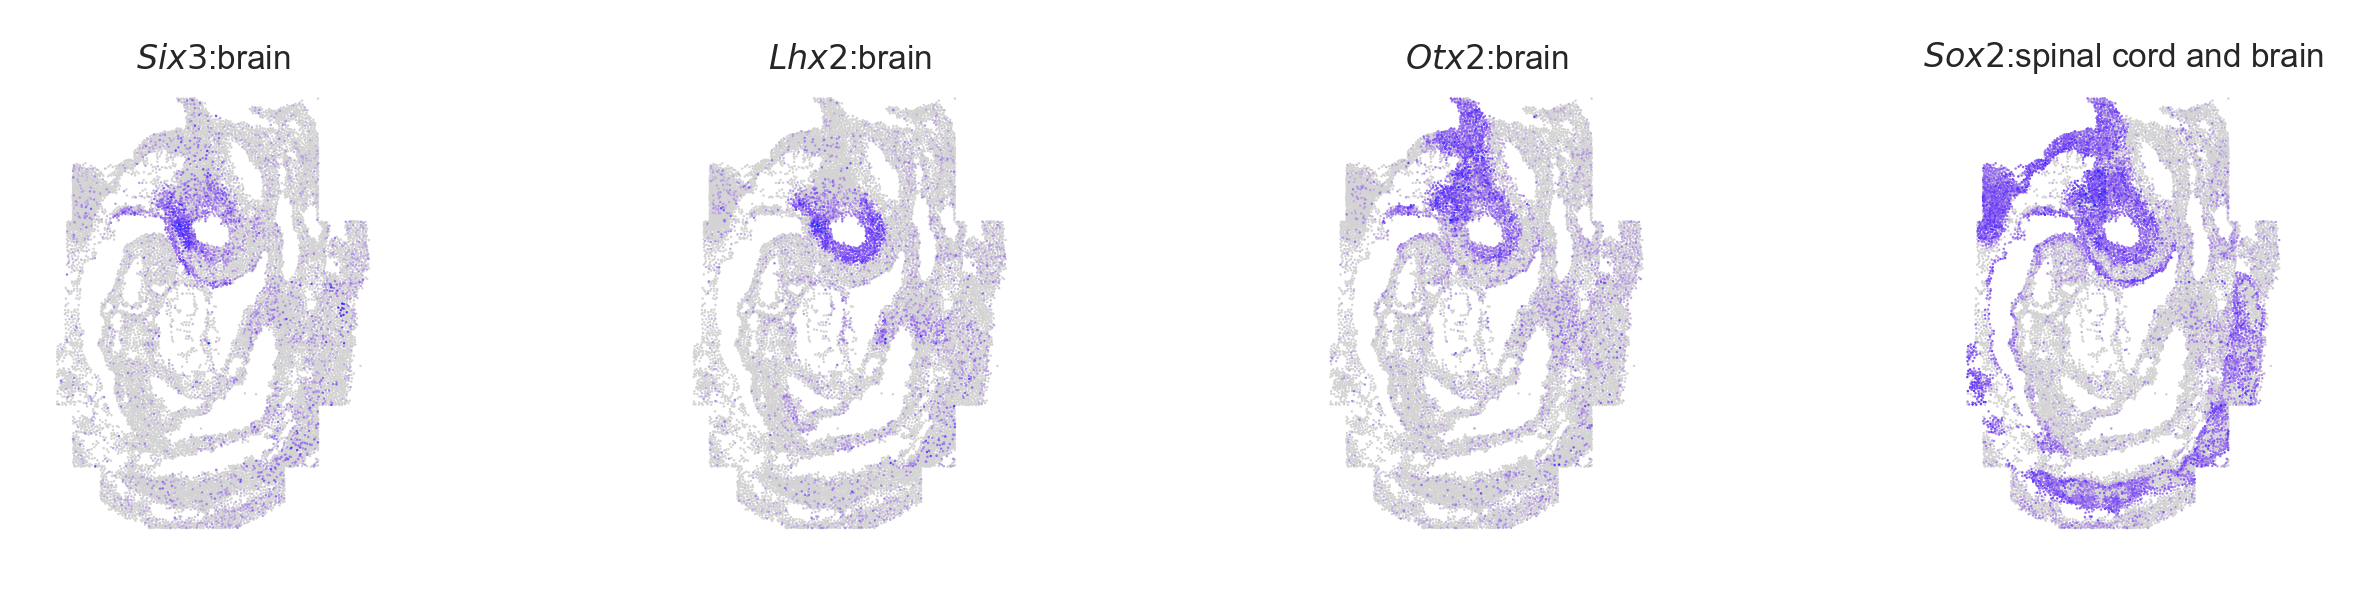

In [36]:
n_feat = len(gene_view)
plot_col_n = 4
    
fig, axs = plt.subplots(int(np.ceil(n_feat/plot_col_n)), plot_col_n,
                        figsize=(20*centimeter, 4*int(np.ceil(n_feat/plot_col_n))*centimeter), 
                        subplot_kw={'aspect': 'equal'})
axs = axs.ravel()

for iddd, i_gene in enumerate(gene_view):
    
    i_plot = sc.pl.spatial(adata_seqFISH, color=i_gene, spot_size=0.04, 
                           frameon=False, 
                           cmap=newcmp,                              #'magma', 
                           show=False, 
                           title = '',
                           ax=axs[iddd])
    
#     axs[iddd].set_title(structure[iddd], pad=0, fontsize=7, )
    axs[iddd].set_title( '$\it{}$'.format(gene_view[iddd]) + ':' + structure[iddd], pad=0, fontsize=6, )
#     axs[iddd].set_title(gene_view[iddd], pad=0, fontsize=5, fontdict={'style':'italic'})
    
    cbar_ax = fig.get_axes()[-1]
    cbar_ax.remove()

    # colorbar cax
#     cax = axs[iddd].figure.add_axes(mtransforms.Bbox.from_extents(axs[iddd].get_position().x1 + 0.01,
#                                   axs[iddd].get_position().y0+0.02,
#                                   axs[iddd].get_position().x1 + 0.01 + 0.01,
#                                   axs[iddd].get_position().y1-0.02), )# facecolor='none'
#     plt.colorbar(i_plot[0].collections[0], cax=cax, orientation='vertical')
#     cax.tick_params(direction='out', labelsize=5, length=1, width=0.3, pad=0.6, )
#     cax.set_frame_on(False)

#     cax.set_title(gene_view[iddd], pad=0, fontsize=5, fontdict={'style':'italic'})
#     cax.set_title('$\it{}$'.format(gene_view[iddd]), pad=0, fontsize=5)

title = '4_structures'
plt.savefig('Fig3S_seqfish_marker_gene_{}.pdf'.format(title), 
            bbox_inches='tight', format='pdf', dpi=400)